![rocket banner](images/space-mission.png "Space mission launches banner")

### Exploratory Data Analysis: `SPACE MISSION LAUNCHES`

<hr style="border:2px solid gray">

#### Install packages and libraries needed

In [1]:
#pip install pandasql
#pip install pandas
#pip install numpy
#pip install matplotlib
#pip install seaborn
#pip zipfile
#pip sqlalchemy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile
#import kaggle
import datetime

from sqlalchemy import engine
from pandasql import sqldf

pysqldf = lambda query: sqldf(query, globals())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### Downloading dataset from Kaggle

In [3]:
!kaggle datasets download -d sefercanapaydn/mission-launches

Traceback (most recent call last):
  File "/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/requests/compat.py", line 11, in <module>
    import chardet
ModuleNotFoundError: No module named 'chardet'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/mayv/anaconda3/envs/base-environment/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/kaggle/__init__.py", line 19, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/kaggle/api/__init__.py", line 22, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/kaggle/api/kaggle_api_extended.py", line 84, in <module>
    import requests
  File "/Users/mayv/anaconda3/en

In [4]:
#Unzip files
zipfile_name = 'mission-launches.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

#### Load data into a dataframe

In [5]:
df_mission = pd.read_csv('mission_launches.csv')
display(df_mission.head())
print("Rows x Columns: ", df_mission.shape)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


Rows x Columns:  (4324, 9)


#### List of columns

In [6]:
list(df_mission.columns)

['Unnamed: 0.1',
 'Unnamed: 0',
 'Organisation',
 'Location',
 'Date',
 'Detail',
 'Rocket_Status',
 'Price',
 'Mission_Status']

In [7]:
df_mission.rename(columns={"Organisation": "Organization"}, inplace=True)

#### Types in dataset

In [8]:
df_mission.dtypes

Unnamed: 0.1       int64
Unnamed: 0         int64
Organization      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object

_Organization_, _Location_, _Detail_, _Rocket_Status_ and _Mission_Status_ should be of type 'string', however they are of type 'object'. <br> <br> 
_Date_ should be of type 'datetime' and _Price_ should be 'float'.
Let's going to convert them to appropiate type.

In [9]:
df_mission['Organization'] = df_mission['Organization'].astype('string')
df_mission['Location'] = df_mission['Location'].astype('string')
df_mission['Detail'] = df_mission['Detail'].astype('string')
df_mission['Rocket_Status'] = df_mission['Rocket_Status'].astype('string')
df_mission['Mission_Status'] = df_mission['Mission_Status'].astype('string')
df_mission.dtypes

Unnamed: 0.1               int64
Unnamed: 0                 int64
Organization      string[python]
Location          string[python]
Date                      object
Detail            string[python]
Rocket_Status     string[python]
Price                     object
Mission_Status    string[python]
dtype: object

In [10]:
df_mission['Date'] = pd.to_datetime(df_mission['Date'], infer_datetime_format=True, errors='coerce')

df_mission['Date'].dtype
df_mission['Date']

/var/folders/5f/yflkgdd93pgb650cqwwbyqb40000gn/T/ipykernel_48531/199377942.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_mission['Date'] = pd.to_datetime(df_mission['Date'], infer_datetime_format=True, errors='coerce')


0      2020-08-07 05:12:00+00:00
1      2020-08-06 04:01:00+00:00
2      2020-08-04 23:57:00+00:00
3      2020-07-30 21:25:00+00:00
4      2020-07-30 11:50:00+00:00
                  ...           
4319   1958-02-05 07:33:00+00:00
4320   1958-02-01 03:48:00+00:00
4321   1957-12-06 16:44:00+00:00
4322   1957-11-03 02:30:00+00:00
4323   1957-10-04 19:28:00+00:00
Name: Date, Length: 4324, dtype: datetime64[ns, UTC]

In [11]:
#price_years = df_mission[['Year', 'Price']]
df_mission['Price'] = pd.to_numeric(df_mission['Price'], errors='coerce')
df_mission['Price'].dtype

dtype('float64')

#### Columns with null values

In [12]:
df_mission.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organization         0
Location             0
Date               126
Detail               0
Rocket_Status        0
Price             3375
Mission_Status       0
dtype: int64

'Price' and 'Date' column have null values.

#### Drop columns that we won't use: _'Unnamed: 0.1'_	and _'Unnamed: 0'_

In [13]:
df_mission[['Unnamed: 0.1', 'Unnamed: 0']]

,Unnamed: 0.1,Unnamed: 0
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
4319,4319,4319
4320,4320,4320
4321,4321,4321
4322,4322,4322


This values are unuseful, so we are going to delete them.

In [14]:
df_mission.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True) # or mission.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
print('Rows x Columns: ', df_mission.shape) #Should be: (4324, 7)

Rows x Columns:  (4324, 7)


#### Statistics about numerical columns


In [15]:
df_mission.describe()

,Price
count,949.000000
mean,129.795237
std,143.220323
min,5.300000
25%,40.000000
50%,62.000000
75%,164.000000
max,450.000000


#### Statistics about string columns

In [16]:
df_mission.describe(include='string')

,Organization,Location,Detail,Rocket_Status,Mission_Status
count,4324,4324,4324,4324,4324
unique,56,137,4278,2,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,Success
freq,1777,235,6,3534,3879


#### Count duplicated values

In [17]:
print ("Duplicate values: ", df_mission.duplicated().sum())


Duplicate values:  12


#### Unique values per column

In [18]:
for col in df_mission.columns:
    unique_count = df_mission[col].nunique()
    print (col + ' has ' + str(unique_count) + ' unique values')

Organization has 56 unique values
Location has 137 unique values
Date has 4194 unique values
Detail has 4278 unique values
Rocket_Status has 2 unique values
Price has 54 unique values
Mission_Status has 4 unique values


#### Unique values _Mission_Status_ and _Rocket_Status_

In [19]:
print ("Unique values of Rocket_Status: ", list(df_mission.Rocket_Status.unique()))
print ("Unique values of Mission Status: ",list(df_mission.Mission_Status.unique()) )

Unique values of Rocket_Status:  ['StatusActive', 'StatusRetired']
Unique values of Mission Status:  ['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure']


#### Create a new column: _Year_

In [20]:
df_mission['Year'] = df_mission.Date.dt.year
df_mission.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020.0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020.0
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020.0
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020.0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020.0


In [21]:
df_mission.tail()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958.0
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1958.0
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957.0
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957.0
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,1957.0


<hr style="border:2px solid gray">

#### EDA - Exploratory Data Analysis

1. Who launched the most missions in any given year?

In [22]:
df_mission.groupby('Organization').count()['Mission_Status'].sort_values(ascending=False)

Organization
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Eurockot              13
ISA                   13
Rocket Lab            13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
Land Launch            7
MITT                   7
JAXA                   7
UT                     5
CASIC                  5
KCST                   5
CECLES                 4
Exos                   4
Arm??e de l'

In [38]:
query = """
Select Year, Organization, count(Organization) as launches
from df_mission
group by Year, Organization
order by launches desc
"""
results = pysqldf(query)
results

,Year,Organization,launches
0,1976.0,RVSN USSR,93
1,1977.0,RVSN USSR,92
2,1971.0,RVSN USSR,90
3,1975.0,RVSN USSR,88
4,1970.0,RVSN USSR,86
...,...,...,...
646,2020.0,IAI,1
647,2020.0,IRGC,1
648,2020.0,ISA,1
649,2020.0,JAXA,1


2. How has the cost of a space mission varied over time?

In [25]:
query = """
Select Year, count(Year) as Launches, sum(Price) as TotalPerYear, sum(Price)/count(Year) as Avg
from df_mission
group by Year
"""
results = pysqldf(query)
results.sort_values('Avg', ascending=False)

,Year,Launches,TotalPerYear,Avg
54,2010.0,36,4303.6,119.544444
53,2009.0,49,5588.9,114.059184
55,2011.0,41,4251.3,103.690244
56,2012.0,34,3026.3,89.008824
58,2014.0,52,4204.6,80.857692
...,...,...,...,...
20,1976.0,109,NaN,NaN
21,1977.0,109,NaN,NaN
22,1978.0,93,NaN,NaN
23,1979.0,46,NaN,NaN


/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning

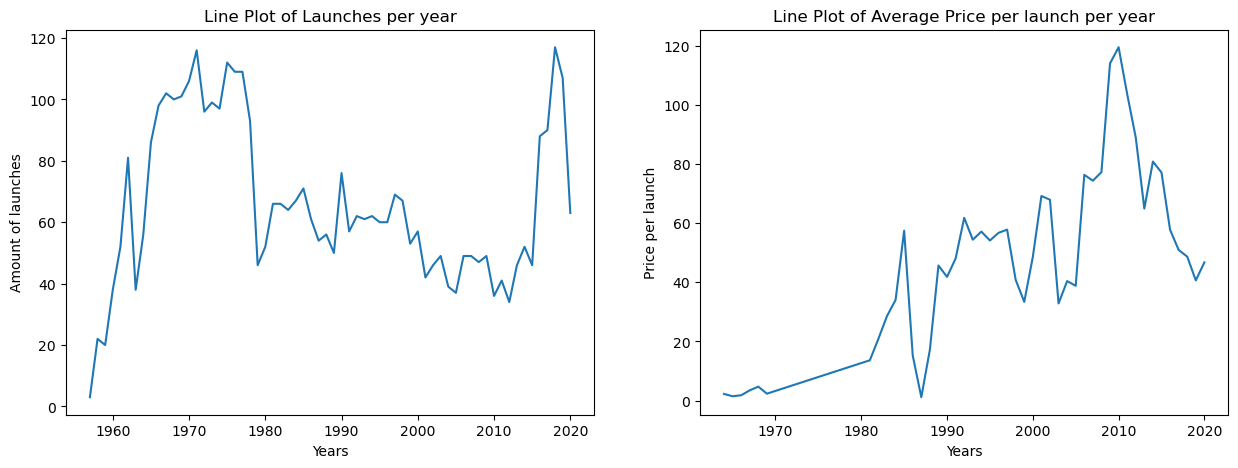

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: 
sns.lineplot(data=results, x='Year', y='Launches', ax=axes[0])
axes[0].set_title('Line Plot of Launches per year')
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Amount of launches')

# Subplot 2:
sns.lineplot(data=results, x='Year', y='Avg', ax=axes[1])
axes[1].set_title ('Line Plot of Average Price per launch per year')
axes[1].set_ylabel('Price per launch')
axes[1].set_xlabel('Years')

plt.show()

3. Which months are the most popular for launches?

In [27]:
query = """
select Date, strftime('%m', Date) as month
from df_mission
"""

months = pysqldf(query)
months = months.sort_values(by='month', ascending=True)

In [28]:
popular_months = months.month.value_counts()
popular_months

month
12    430
06    386
10    375
04    366
08    358
09    354
03    349
07    347
11    325
02    323
05    320
01    265
Name: count, dtype: int64

/var/folders/5f/yflkgdd93pgb650cqwwbyqb40000gn/T/ipykernel_48531/3149520021.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=months, x='month', shrink=.8, palette='bright')
/Users/mayv/anaconda3/envs/base-environment/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


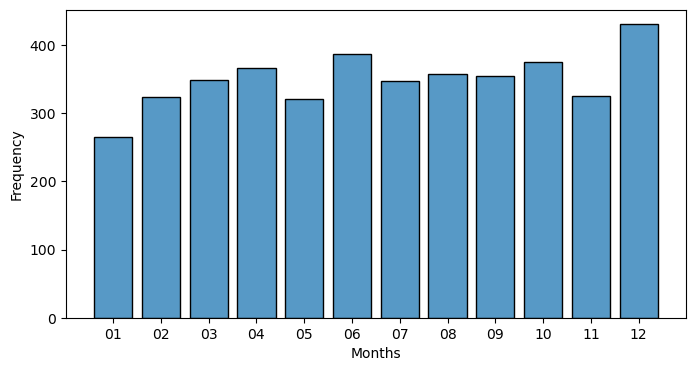

In [29]:
plt.figure(figsize=(8,4))
sns.histplot(data=months, x='month', shrink=.8, palette='bright')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show()

4. Have space missions gotten safer or has the chance of failure remained unchanged? <br>


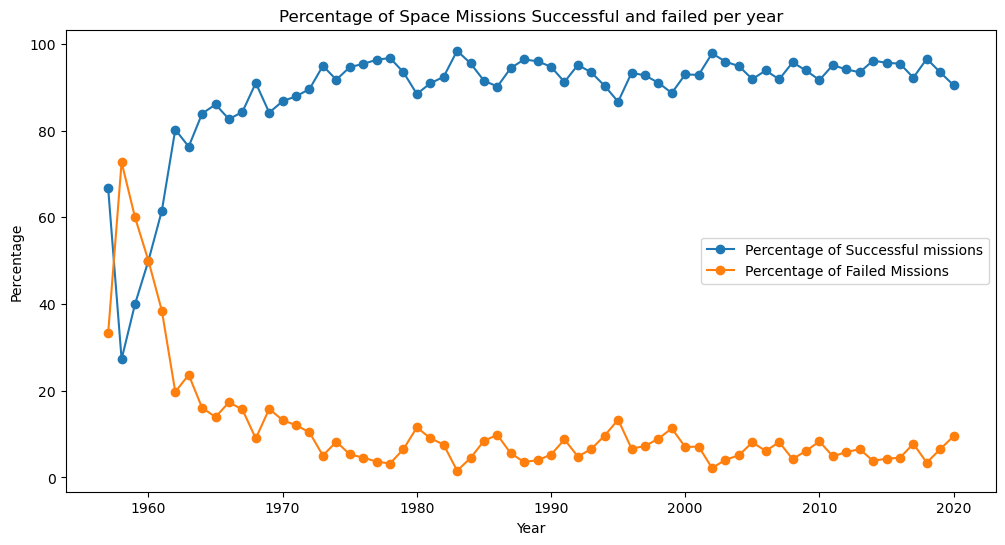

In [30]:

# Calcular el número total de misiones por año
missions_per_year = df_mission.groupby('Year').size()

# Calcular el número de misiones exitosas por año
missions_success_per_year = df_mission[df_mission['Mission_Status'] == 'Success'].groupby('Year').size()

# Calcular el número de misiones fallidas por año
missions_failure_per_year = df_mission[df_mission['Mission_Status'].isin(['Failure', 'Prelaunch Failure', 'Partial Failure'])].groupby('Year').size()

# Unir las series en un solo DataFrame
df_results = pd.DataFrame({
    'Total Missions': missions_per_year,
    'Missions Success': missions_success_per_year,
    'Missions Failded': missions_failure_per_year
})

# Reemplazar NaN con 0
df_results = df_results.fillna(0)

# Calcular los porcentajes
df_results['% Successful'] = (df_results['Missions Success'] / df_results['Total Missions']) * 100
df_results['% Failed'] = (df_results['Missions Failded'] / df_results['Total Missions']) * 100

df_results

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df_results.index, df_results['% Successful'], marker='o', label='Percentage of Successful missions')
plt.plot(df_results.index, df_results['% Failed'], marker='o', label='Percentage of Failed Missions')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Space Missions Successful and failed per year')
plt.legend()
plt.grid(False)
plt.show()